In [165]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from tqdm.notebook import tqdm

In [1]:
in_file = '../data/processed/stats.pkl'
with open(in_file, 'rb') as f:
    contents = pickle.load(f)    

In [10]:
usernames = contents['usernames']
features = contents['features']
stats = contents['stats']

In [11]:
len(usernames), stats.shape

(1938253, (1938253, 72))

In [14]:
features = {feature: i for i, feature in enumerate(features)}

In [15]:
attack_levels = stats[:, features['attack_level']]

In [17]:
np.min(attack_levels)

-1

In [29]:
np.sum(attack_levels == -1)

256329

In [30]:
keep_inds = attack_levels != -1
attack_levels = attack_levels[keep_inds]

In [31]:
len(attack_levels)

1681924

(array([0.00000e+00, 8.60000e+01, 1.70000e+01, 1.50000e+01, 5.20000e+01,
        1.30000e+01, 3.00000e+01, 1.90000e+01, 1.10000e+01, 5.10000e+01,
        9.00000e+00, 1.00000e+00, 1.40000e+01, 4.00000e+00, 9.00000e+00,
        5.30000e+01, 1.30000e+01, 5.00000e+00, 6.00000e+00, 1.01000e+02,
        2.30000e+01, 2.60000e+01, 7.00000e+00, 1.60000e+01, 2.80000e+01,
        6.00000e+00, 1.10000e+01, 1.10000e+01, 1.50000e+01, 2.98000e+02,
        7.00000e+01, 1.16000e+02, 1.16000e+02, 7.30000e+01, 6.10000e+01,
        1.09000e+02, 9.40000e+01, 8.70000e+01, 7.10000e+01, 1.71200e+03,
        7.37000e+02, 7.16000e+02, 5.69000e+02, 1.15500e+03, 1.58300e+03,
        1.09500e+03, 7.72000e+02, 7.89000e+02, 7.49000e+02, 5.94800e+03,
        5.84300e+03, 1.54270e+04, 1.35930e+04, 1.14550e+04, 1.45680e+04,
        9.91100e+03, 8.97200e+03, 7.75600e+03, 5.24300e+03, 1.99738e+05,
        4.89690e+04, 2.62110e+04, 1.65110e+04, 1.28920e+04, 3.91820e+04,
        1.46010e+04, 1.20090e+04, 1.08000e+04, 7.75

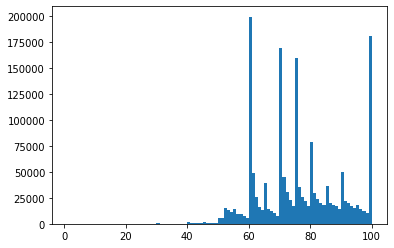

In [37]:
plt.hist(attack_levels, bins=np.arange(1, 101))

In [99]:
def plot_skill_hist(skill):
    feature = skill + '_level'
    levels = stats[:, features[feature]]
    levels = levels[levels > 0]
    plt.figure(figsize=(12, 8))
    g = seaborn.histplot(levels, bins=np.arange(1, 101)) # [1, 2), [2, 3), ..., [99, 100]
    g.set_yscale('log')
    plt.show()

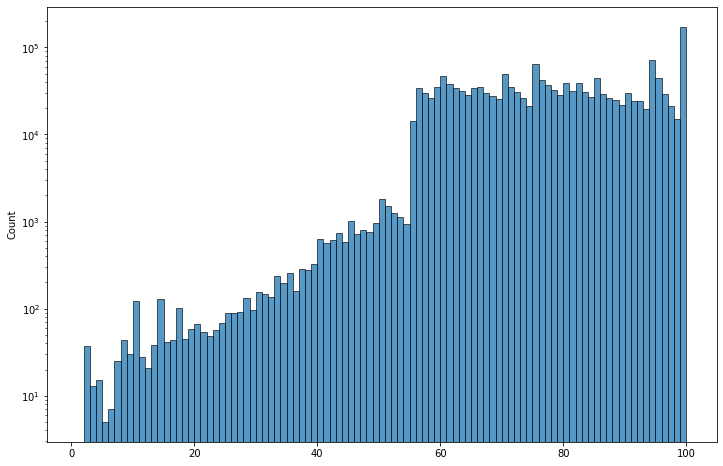

In [100]:
plot_skill_hist('magic')

In [135]:
att_lvls = stats[:, features['attack_level']]
att_keep_inds = att_lvls > 0
str_lvls = stats[:, features['strength_level']]
str_keep_inds = str_lvls > 0
def_lvls = stats[:, features['defence_level']]
def_keep_inds = def_lvls > 0
keep_inds = np.logical_and(att_keep_inds, str_keep_inds, def_keep_inds)
att_lvls = att_lvls[keep_inds]
str_lvls = str_lvls[keep_inds]
def_lvls = def_lvls[keep_inds]

In [136]:
att_str_corr = pearsonr(att_lvls, str_lvls)
def_str_corr = pearsonr(def_lvls, str_lvls)
print(att_str_corr)
print(def_str_corr)

(0.8260904762074041, 0.0)
(0.4608775171406557, 0.0)


In [137]:
23*23

529

In [139]:
import csv
with open('../reference/skills.csv', 'r') as f:
    reader = csv.reader(f)
    skills = [line[0] for line in reader]

In [140]:
skills

['total',
 'attack',
 'defence',
 'strength',
 'hitpoints',
 'ranged',
 'prayer',
 'magic',
 'cooking',
 'woodcutting',
 'fletching',
 'fishing',
 'firemaking',
 'crafting',
 'smithing',
 'mining',
 'herblore',
 'agility',
 'thieving',
 'slayer',
 'farming',
 'runecraft',
 'hunter',
 'construction']

In [158]:
def correlate_skills(skill_a, skill_b):
    levels_a = stats[:, features[skill_a + '_level']]
    levels_b = stats[:, features[skill_b + '_level']]
    keep_inds_a = levels_a > 0
    keep_inds_b = levels_b > 0
    keep_inds = np.logical_and(keep_inds_a, keep_inds_b)
    levels_a = levels_a[keep_inds]
    levels_b = levels_b[keep_inds]
    r_value, _ = pearsonr(levels_a, levels_b)
    return r_value

In [163]:
r_matrix = np.zeros((len(skills), len(skills)))
for i, skill_i in tqdm(enumerate(skills)):
    for j, skill_j in tqdm(enumerate(skills)):
        if i > j:
            continue
        r = correlate_skills(skill_i, skill_j)
        r_matrix[i, j] = r
        r_matrix[j, i] = r

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

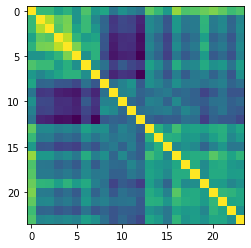

In [164]:
plt.imshow(r_matrix)
plt.show()